In [8]:
import pandas as pd
df=pd.read_csv(r"C:\Users\sumit\Desktop\Code\python\Machine Learning\K means\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


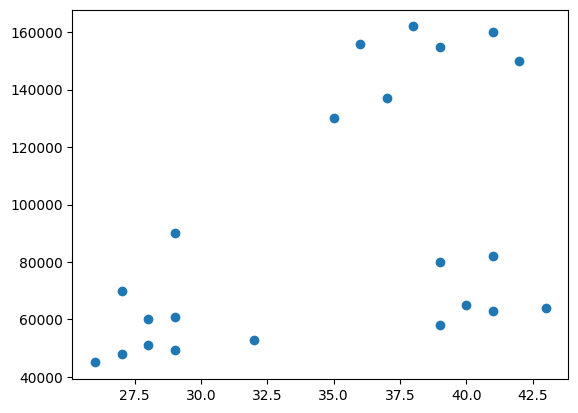

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df[['Age']],df[['Income($)']])
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


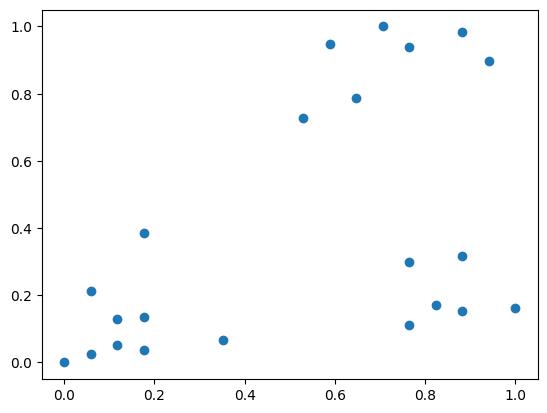

In [11]:
plt.scatter(df[['Age']],df[['Income($)']])
plt.show()

In [12]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [27]:
df['predict']=y_predict
df.head()

,Name,Age,Income($),predict
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [14]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [16]:
df1=df[df.predict==0]
df2=df[df.predict==1]
df3=df[df.predict==2]

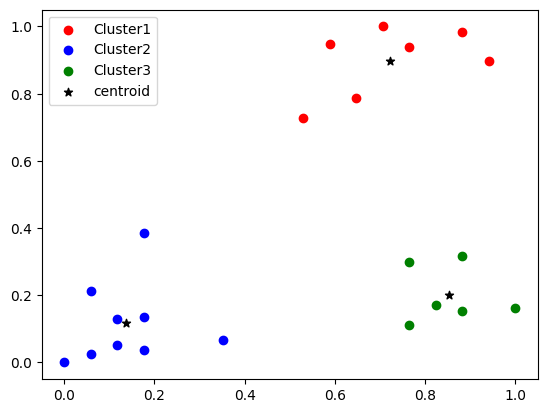

In [31]:
plt.scatter(df1.Age,df1[['Income($)']],color='r',label='Cluster1')
plt.scatter(df2.Age,df2[['Income($)']],color='b',label='Cluster2')
plt.scatter(df3.Age,df3[['Income($)']],color='g',label='Cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()
plt.show()

In [39]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km1=KMeans(n_clusters=k)
    km1.fit(df[['Age','Income($)']])
    sse.append(km1.inertia_)
sse

c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21055478995472496,
 0.174623865866879,
 0.14391444958090926,
 0.10188787724979426]

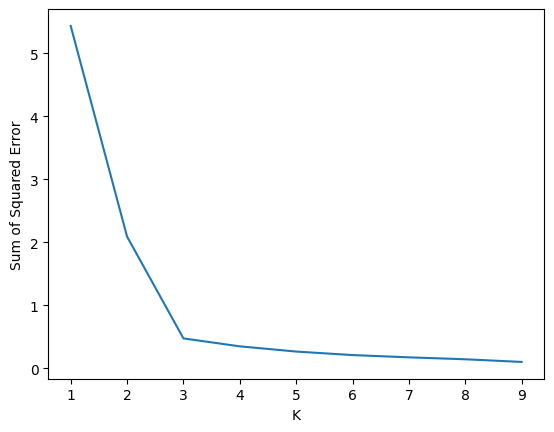

In [42]:
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.show()